In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from qiskit import IBMQ, Aer
from qiskit.compiler import transpile
from main import *

In [3]:
IBMQ.load_account()
provider    = IBMQ.get_provider(hub='ibm-q-research-2', group='csic-1', project='main')
backend     = provider.get_backend('ibm_perth')
simulator   = Aer.get_backend('aer_simulator')

In [4]:
dpmt = device_process_measurement_tomography( backend, qubits=[0,1], parall_qubits=[[(0,1)]] )
circuits_dpmt = dpmt.circuits()
job = simulator.run( transpile( circuits_dpmt, backend ), shots=2**13 ) 

In [5]:
results_tomography = dpmt.fit( job.result(), paralell=True, gate_set=False )         
results_single     = results_tomography.single                             
results_double     = results_tomography.double                            
results_gateset    = results_tomography.gateset   

In [6]:
np.sum( results_single.entropies, 1 ), np.sum( results_single.funs, 1 )

(array([5.27076367, 5.2705876 ]), array([5.27095277, 5.2709209 ]))

In [7]:
results_tomography = dpmt.fit( job.result(), paralell=True, gate_set=True )         
results_single     = results_tomography.single                             
results_double     = results_tomography.double                            
results_gateset    = results_tomography.gateset   

In [13]:
np.sum( results_single.entropies, 1 ), np.sum( results_single.funs, 1 )

(array([5.27076367, 5.2705876 ]), array([5.27090342, 5.27089405]))

In [16]:
np.sum( results_double[0].entropies ), np.sum( results_double[0].funs )

(63.24516937468518, 63.25110158843156)

Text(0, 0.5, '$\\lambda$')

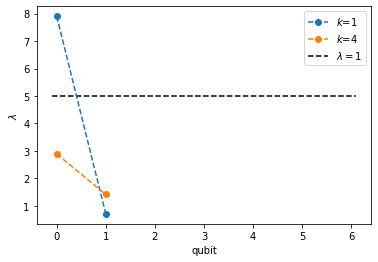

In [9]:
DeltaL = 2**13*( np.sum(np.array(results_single.entropies)[:,1:],1) 
                - np.sum(np.array(results_single.funs)[:,1:],1) )
DeltaL[DeltaL<0] = 0
DeltaN = 4  
lambda_4 = abs( 2*DeltaL-DeltaN )/np.sqrt( 2*DeltaN )  
DeltaN = 1
lambda_1 = abs( 2*DeltaL-DeltaN )/np.sqrt( 2*DeltaN ) 

plt.plot( range(2), lambda_1, '--o',label='$k$=1')
plt.plot( range(2), lambda_4, '--o',label='$k$=4')
plt.hlines( 5, -0.1, 6.1, color='black', linestyles='dashed', label='$\lambda=1$'  )
plt.legend()
plt.xlabel('qubit')
plt.ylabel('$\lambda$')

In [10]:
DeltaL = np.abs([ 2**13*( np.sum(np.array(results_double[k].entropies)[:,1:],1) 
                - np.sum(np.array(results_double[k].funs)[:,1:],1) ) for k in range(3) ])
DeltaL[DeltaL<0] = 0
DeltaN = 12
lambda_12 = ( abs( 2*DeltaL-DeltaN )/np.sqrt( 2*DeltaN ) ).flatten()
DeltaN = 1
lambda_1 = ( abs( 2*DeltaL-DeltaN )/np.sqrt( 2*DeltaN ) ).flatten()
DeltaN = 8
lambda_8 = ( abs( 2*DeltaL-DeltaN )/np.sqrt( 2*DeltaN ) ).flatten()

Idx = [3,4,0,2,1,5]
plt.plot( range(1), lambda_1[Idx], '--o',label='$k$=1')
plt.plot( range(1), lambda_8[Idx], '--o',label='$k$=8')
plt.plot( range(1), lambda_12[Idx], '--o',label='$k$=12')
plt.hlines( 5, -0.1, 5.1, color='black', linestyles='dashed', label='$\lambda=5$'  )
plt.xticks( range(6), labels=[ '(0,1)', '(1,2)', '(1,3)', '(3,5)', '(4,5)', '(5,6)' ] )
plt.legend()
plt.xlabel('pair of qubits')
plt.ylabel('$\lambda$')

IndexError: list index out of range